# Project - Intro to Analytical Thinking

--- 
## The description:
We will go back to the Berlin rental prices dataset, this time we will ask you to answer broader questions and come to a conclusion based on your analysis.

Apply the methodology you learned today to answer the following questions. On top of writing the code, we will ask you to be explicit about your analytical approach.

Suppose you are an analytics consultant and your client is the Senate of Berlin, looking to draft policy suggestions to help make rent more accessible in the city. 

While they have not (yet) asked you for a recommendation, they need to understand the market's current state.

For that, you are asked:

1. Is there a shortage of *affordable* appartments in Berlin as a whole, or is the issue concentrated in select neighbourhoods? (hint: you will need to define "affordable" based on some criteria)

1. A few companies are exploring *Apartment renovation* as a viable business model — what impact could this practice have in the availability of *affordable* apartments?


--- 
## The dataset:
Y'all know this one already but to recap, this is a list of rental appartments in Berlin. One row is for one appartment. The dataset contains 6 columns. 
- Region: is the Berlin district, where the flat is located
- Condition: is the condition of the flat
- Rooms: The number of rooms the flat has
- Rent: Monthly rent for the flat
- Year_Construction: The year in which the house was build
- Space: How many square meters does the flat has?

As you delve on this analysis please remember that this is a scraped **snapshot** of the marketplace (there's no time dimension in this dataset).

--- 
## The Task:

For each of the questions:
- Define all the terms in the question that seem ambiguous — teachers should be able to help you with answers or assumptions
- Break down the question into smaller questions that can be answered with an analysis as we have studied
- Build a few plots or other types of analyses to answer the questions
- (Nice to have) Explore any source of variability that your current analysis may not cover and note any additional analyses you would like to do if you had more data
- Write as a conclusion an answer to the question

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the dataset
df = pd.read_csv('https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv')
df.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27


In [2]:
df.describe()

,Rooms,Rent,Year_Construction,Space
count,764.000000,764.000000,764.000000,764.000000
mean,2.549738,1768.560942,1983.695026,84.656270
std,1.010826,1118.263961,48.006060,44.195338
min,1.000000,271.250000,1864.000000,14.000000
25%,2.000000,1039.500000,1959.000000,55.097500
50%,2.500000,1565.480000,2015.000000,77.600000
75%,3.000000,2170.000000,2019.000000,104.450000
max,7.000000,14207.000000,2020.000000,413.910000


In [6]:
df.groupby('Region')['Rent'].mean().reset_index().sort_values(by='Rent')

,Region,Rent
8,Wedding,847.138571
1,Friedrichsfelde,1043.871731
3,Köpenick,1125.475818
5,Neukölln,1188.114915
9,Wilmersdorf,1748.646226
0,Charlottenburg,1753.452532
7,Tiergarten,1914.824795
6,Prenzlauer,1996.962264
2,Kreuzberg,2049.138085
4,Mitte,2408.725033


In [13]:
df.groupby('Region')['Rent'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Wedding,42.0,847.138571,333.446416,352.95,651.2775,771.50,963.095,1949.26
Friedrichsfelde,52.0,1043.871731,403.402469,280.74,800.4625,971.00,1288.090,2138.68
Köpenick,55.0,1125.475818,390.822563,558.06,826.2450,969.00,1474.410,2159.20
Neukölln,59.0,1188.114915,552.145415,379.95,708.5300,1055.43,1699.660,2295.00
Wilmersdorf,53.0,1748.646226,941.443278,404.39,1250.0000,1557.28,1980.000,5876.35
Charlottenburg,79.0,1753.452532,1125.786523,478.52,1200.0000,1498.00,2155.000,9774.00
Tiergarten,171.0,1914.824795,786.464690,271.25,1492.0000,1869.56,2281.990,4945.00
Prenzlauer,53.0,1996.962264,1088.544439,475.00,1294.0000,1639.52,2724.170,5930.00
Kreuzberg,47.0,2049.138085,1172.802355,435.74,1190.6500,1817.00,2577.695,6450.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


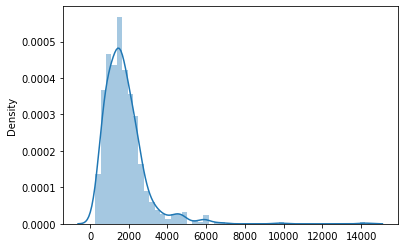

In [25]:
sns.distplot(x=df.Rent);

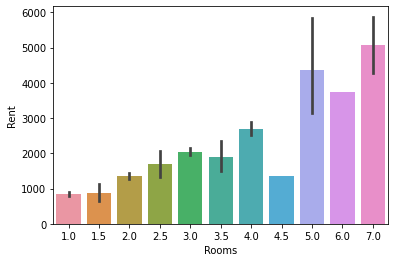

In [27]:
sns.barplot(x='Rooms', y='Rent', data=df);

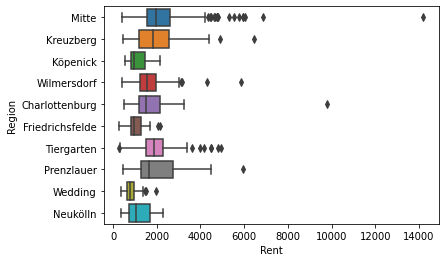

In [33]:
sns.boxplot(x='Rent', y='Region', data=df)

In [34]:
df.groupby('Region')['Rent'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Wedding,42.0,847.138571,333.446416,352.95,651.2775,771.50,963.095,1949.26
Friedrichsfelde,52.0,1043.871731,403.402469,280.74,800.4625,971.00,1288.090,2138.68
Köpenick,55.0,1125.475818,390.822563,558.06,826.2450,969.00,1474.410,2159.20
Neukölln,59.0,1188.114915,552.145415,379.95,708.5300,1055.43,1699.660,2295.00
Wilmersdorf,53.0,1748.646226,941.443278,404.39,1250.0000,1557.28,1980.000,5876.35
Charlottenburg,79.0,1753.452532,1125.786523,478.52,1200.0000,1498.00,2155.000,9774.00
Tiergarten,171.0,1914.824795,786.464690,271.25,1492.0000,1869.56,2281.990,4945.00
Prenzlauer,53.0,1996.962264,1088.544439,475.00,1294.0000,1639.52,2724.170,5930.00
Kreuzberg,47.0,2049.138085,1172.802355,435.74,1190.6500,1817.00,2577.695,6450.00


In [54]:
df2 = df.loc[df.Rent <= 1039]
df1= df.loc[df.Rent <= 1039].groupby('Region')['Rent'].count().reset_index(name='Count')
df1

,Region,Count
0,Charlottenburg,15
1,Friedrichsfelde,31
2,Kreuzberg,8
3,Köpenick,31
4,Mitte,7
5,Neukölln,29
6,Prenzlauer,8
7,Tiergarten,20
8,Wedding,33
9,Wilmersdorf,9


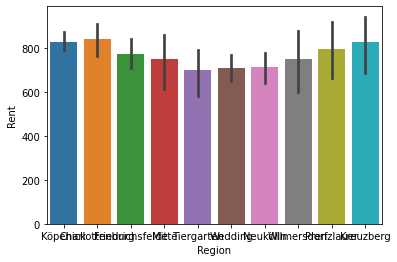

In [71]:
sns.barplot(x='Region', y='Rent', data=df2, );

In [68]:
df2.groupby('Condition')['Rent'].count().reset_index(name='Count').sort_values(by='Count')

,Condition,Count
1,first_time_use_after_refurbishment,3
5,need_of_renovation,4
7,refurbished,8
2,fully_renovated,11
4,modernized,14
3,mint_condition,26
6,no_information,33
0,first_time_use,37
8,well_kept,55


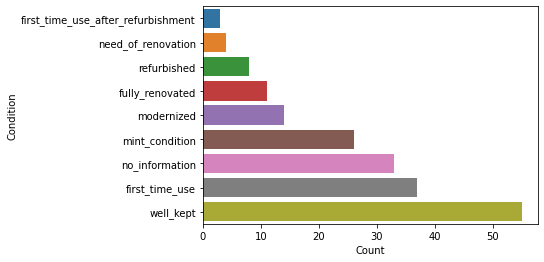

In [69]:
sns.barplot(x='Count', y='Condition', data=df2.groupby('Condition')['Rent'].count().reset_index(name='Count').sort_values(by='Count'));